In [5]:
#Imports
import gspread
import json
import oauth2client
from oauth2client.service_account import ServiceAccountCredentials
import numpy
import pandas

In [33]:
#Access GSheet "Fluxo de Caixa"
scope = ["https://spreadsheets.google.com/feeds"]

#credentials = ServiceAccountCredentials.from_json_keyfile_name("C:/Users/Cleverton/Google Drive/CleverSports/Clever Sports-db6d4aab1f00.json",scope)

credentials = ServiceAccountCredentials.from_json_keyfile_name("/home/CERTI/ccr/Downloads/db6d4aab1f00.json",scope)

client = gspread.authorize(credentials)

spreadsheet = client.open("Fluxo_de_Caixa_Livre_CleverSports")

worksheet = spreadsheet.worksheet("Dados_raw")

data = worksheet.get_all_values()


In [39]:
panda_data = pandas.DataFrame(data)
panda_data
#Create a Variable with TRUE if the product is the target
fr920xt = panda_data[2] == "010-01338-26"
#select all rows with the target product
new_data = panda_data[fr920xt]
new_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
6,01/09/2015,CMV_SET,010-01338-26,Fenix 3,FENIX 3 BUNDLE W/ HRM-RUN SAPPHIRE,"2.312,80",3,"6.938,40",,,,,,Estoque,2015,36,2,9,2015-36,2015-09
12,01/11/2015,CMV_NOV,010-01338-26,Fenix 3,FENIX 3 BUNDLE W/ HRM-RUN SAPPHIRE,"2.269,77",1,"2.269,77",,,,,,Estoque,2015,45,7,11,2015-45,2015-11
22,28/11/2015,,010-01338-26,Fenix 3,FENIX 3 BUNDLE W/ HRM-RUN SAPPHIRE,,,,"2.999,00",2,,"5.998,00",,Venda,2015,48,6,11,2015-48,2015-11
34,01/12/2015,CMV_DEZ,010-01338-26,Fenix 3,FENIX 3 BUNDLE W/ HRM-RUN SAPPHIRE,"2.229,88",2,"4.459,76",,,,,,Estoque,2015,49,2,12,2015-49,2015-12
44,05/12/2015,,010-01338-26,Fenix 3,FENIX 3 BUNDLE W/ HRM-RUN SAPPHIRE,,,,"2.999,00",1,,"2.999,00",,Venda,2015,49,6,12,2015-49,2015-12
63,26/12/2015,,010-01338-26,Fenix 3,FENIX 3 BUNDLE W/ HRM-RUN SAPPHIRE,,,,"2.850,00",1,,"2.850,00",,Venda,2015,52,6,12,2015-52,2015-12
70,01/01/2016,CMV_JAN_16,010-01338-26,Fenix 3,"Fenix 3 Sapphire with HRM-RUN, Metal Band","2.359,91",1,"2.359,91",,,,,,Estoque,2016,1,5,1,2016-01,2016-01
92,09/01/2016,,010-01338-26,Fenix 3,FENIX 3 BUNDLE W/ HRM-RUN SAPPHIRE,,,,"2.949,00",1,,"2.949,00",,Venda,2016,2,6,1,2016-02,2016-01
116,01/02/2016,CMV FEV-16_2,010-01338-26,Fenix 3,FENIX 3 SAPPHIRE WITH HRM-RUN METAL BAND,"2.544,74",3,"7.634,22",,,,,,Estoque,2016,6,1,2,2016-06,2016-02
141,06/02/2016,,010-01338-26,Fenix 3,FENIX 3 SHAPPHIRE C/ HRM-RUN METAL BAND,,,,"3.059,00",1,,"3.059,00",,Venda,2016,6,6,2,2016-06,2016-02


In [25]:
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta
import numpy as np
import matplotlib.dates as md
%matplotlib notebook
#%matplotlib inline
matplotlib.style.use('ggplot')
y = pandas.to_numeric(new_data[8])
x = [dt.strptime(i,"%d/%m/%Y") for i in new_data[0]]
y2 = pandas.to_numeric(new_data[5])

<IPython.core.display.Javascript object>


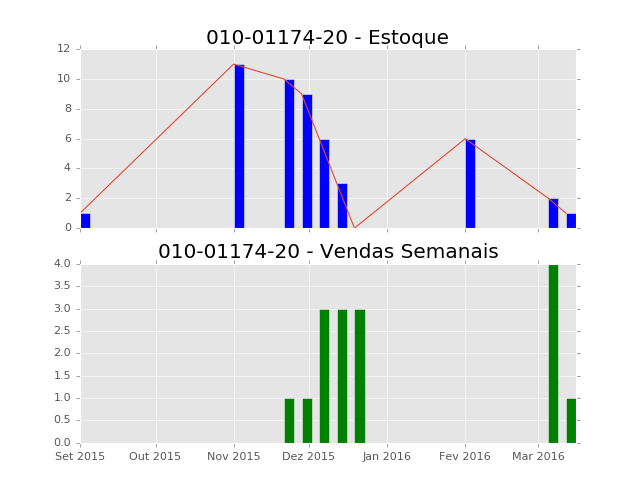

<Container object of 10 artists>

In [24]:

f, axarr = plt.subplots (2, sharex=True)
axarr[0].plot(x,y)
axarr[0].set_title('{} - Estoque'.format(str(new_data[1][1])), fontsize=18)
#plt.xlabel('Semana',fontsize=18)
axarr[0].bar(x,y,4,color="blue")

axarr[1].set_title('{} - Vendas Semanais'.format(str(new_data[1][1])), fontsize=18)
axarr[1].bar(x,y2,4,color="green")


#y2 = pandas.to_numeric(new_data[5])
#plot2 = plt.bar(x,y,4,color="blue")
#plot2.show()
#plt.show()

<Container object of 10 artists>